# Imports

In [1]:
import os
import random
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt 
import numpy as np

# Loading Validation Annual Report

In [2]:
import os
import random

path = r'D:\Mtech NITK\Sem 2\Topic in NLP\fns2020_dataset\validation\validation\annual_reports'
seed = 137

def load_data(file_path, seed):
    """
    
    Load the content of a text file specified by the given file path.

    Parameters:
    - file_path (str): The path to the text file.
    - seed (int): A seed value for randomization or other purposes.

    Returns:
    - str: The content of the text file.
    
    """
    with open(file_path, 'r') as f:
        text = f.read()
    return text

# Specify the filename you want to read
filename_to_read = '30888.txt'
file_path = os.path.join(path, filename_to_read)

# Call the load_data function with the specific file path
data = load_data(file_path, seed)
map_to_data = load_data(file_path, seed)

# Now train_text contains the content of the specified text file
print(data)

 Annual Report  
and Accounts  
2017
Spectris plc Annual Report and Accounts 2017
SOLUTIONS 
DRIVEN
CUSTOMER 
FOCUSED Spectris is a leading supplier of 
productivity-enhancing instrumentation 
and controls. Our businesses are 
leaders in the markets they serve, 
with recognised brands and  
award-winning products.
We provide complete solutions 
combining hardware, software and 
related services for some of the most 
technically-demanding industrial 
applications. Our innovative solutions 
are designed to enhance customers’ 
productivity, yielding clear benefits 
by helping them to work better, 
faster and more efficiently. +13%
+9%
+11%
>100%
+14%
>100%
-38pp
Dividend per share
56.5p
(2016: 52.0p)
2017 highlights
1. The adjusted performance measures represent the statutory results  
excluding certain non-operational items. Like-for-like (‘LFL’) measures are  
stated at constant exchange rates and include acquisitions and disposals on a 
comparable basis. These are deemed alternative pe

# Loading Validation Goldan Summary Report

In [3]:
import os
import random

path = r'D:\Mtech NITK\Sem 2\Topic in NLP\fns2020_dataset\validation\validation\gold_summaries'
seed = 137

def load_data(file_path, seed):
    """
    Load the content of a text file specified by the given file path.

    Parameters:
    - file_path (str): The path to the text file.
    - seed (int): A seed value for randomization or other purposes.

    Returns:
    - str: The content of the text file.
    """
    with open(file_path, 'r') as f:
        text = f.read()
    return text

# Specify the filename you want to read
filename_to_read = '30888_3.txt'
file_path = os.path.join(path, filename_to_read)


map_to_mapper = load_data(file_path, seed)
print(map_to_mapper)

 ENHANCING 
our business
Results overview
In my first year as Chairman of Spectris, it is pleasing to see  
the Group deliver a 6% increase in constant currency, organic  
(like-for-like, ‘LFL’
1
) sales, driving an 8% LFL increase in adjusted 
operating profit. Reported sales increased 13% in 2017 to  
£1,525.6 million and reported operating profit increased to  
£182.4 million resulting in operating margins of 12.0%  
on a reported basis and 14.7% on an adjusted basis. Cash 
conversion
2
 was 75% of our adjusted operating profit following  
a material step-up in growth capex in our Test and Measurement 
division. Adjusted earnings per share (‘EPS’) increased by 14% to 
145.1p with reported basic EPS at 197.0p. 
The Group continues to make good progress on the delivery of its 
strategy and during the year, we made a number of changes to our 
portfolio, including bolt-on acquisitions and a divestment. Following 
these transactions, the Group’s financial position is robust, with net 
de

In [4]:
gsPath = r'D:\Mtech NITK\Sem 2\Topic in NLP\fns2020_dataset\validation\validation\gold_summaries'
def loadFile(filepath):
    """
    Load the content of a file and its corresponding gold summary.

    Parameters:
    - filepath (str): Path to the file.

    Returns:
    - tuple: A tuple containing the content of the file and its corresponding gold summary.
    """
    filename = os.path.basename(filepath)[:-4]
    
    fileCont = open(filepath,"r").read().strip()
    
    summFile = filename+"_1.txt"
    
    gs = open(os.path.join(gsPath,summFile),"r").read().strip()
    
    return fileCont,gs

# Preprocessing Data

In [5]:
# Removing URL's  
def remove_url(review):
    """
    Remove URLs from the input text.

    Parameters:
    - review (str): The input text.

    Returns:
    .
    - str: The text with URLs removed.
    """
    pattern=re.compile(r'https?://\S+|www\.\S+')
    return pattern.sub(r'',review)


map_to_data = remove_url(map_to_data)
#map_to_mapper = remove_url(map_to_mapper)
print(map_to_data)

 Annual Report  
and Accounts  
2017
Spectris plc Annual Report and Accounts 2017
SOLUTIONS 
DRIVEN
CUSTOMER 
FOCUSED Spectris is a leading supplier of 
productivity-enhancing instrumentation 
and controls. Our businesses are 
leaders in the markets they serve, 
with recognised brands and  
award-winning products.
We provide complete solutions 
combining hardware, software and 
related services for some of the most 
technically-demanding industrial 
applications. Our innovative solutions 
are designed to enhance customers’ 
productivity, yielding clear benefits 
by helping them to work better, 
faster and more efficiently. +13%
+9%
+11%
>100%
+14%
>100%
-38pp
Dividend per share
56.5p
(2016: 52.0p)
2017 highlights
1. The adjusted performance measures represent the statutory results  
excluding certain non-operational items. Like-for-like (‘LFL’) measures are  
stated at constant exchange rates and include acquisitions and disposals on a 
comparable basis. These are deemed alternative pe

In [6]:
# Removing Punctuations
import string

#exclude = set(string.punctuation).difference(set(['.', '(', ')']))
exclude = set(string.punctuation).difference(set(['.']))
def remove_punc(review):
    """
    Remove punctuation marks from the given text, except for periods.

    Parameters:
    - review (str): Input text.

    Returns:
    - str: Text with punctuation marks removed, except for periods.
    """
    for char in exclude:
        review = review.replace(char, '')
    return review

data = remove_punc(data)
#map_to_mapper = remove_punc(map_to_mapper)
print(data)


 Annual Report  
and Accounts  
2017
Spectris plc Annual Report and Accounts 2017
SOLUTIONS 
DRIVEN
CUSTOMER 
FOCUSED Spectris is a leading supplier of 
productivityenhancing instrumentation 
and controls. Our businesses are 
leaders in the markets they serve 
with recognised brands and  
awardwinning products.
We provide complete solutions 
combining hardware software and 
related services for some of the most 
technicallydemanding industrial 
applications. Our innovative solutions 
are designed to enhance customers’ 
productivity yielding clear benefits 
by helping them to work better 
faster and more efficiently. 13
9
11
100
14
100
38pp
Dividend per share
56.5p
2016 52.0p
2017 highlights
1. The adjusted performance measures represent the statutory results  
excluding certain nonoperational items. Likeforlike ‘LFL’ measures are  
stated at constant exchange rates and include acquisitions and disposals on a 
comparable basis. These are deemed alternative performance measures under 
th

In [7]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Removing stop words like a,the,me,i
stopwords.words('english')

stop_words = set(stopwords.words('english'))

def remove_stopwords(review):
    """
    Remove stopwords from the given text.

    Parameters:
    - review (str): Input text.

    Returns:
    - str: Text with stopwords removed.
    """
    new_text = []
    for word in review.split():
        if word.lower() not in stop_words and word.lower() not in string.punctuation:
            new_text.append(word)
    return ' '.join(new_text)

data = remove_stopwords(data)
#map_to_mapper = remove_stopwords(map_to_mapper)
print(data)

Annual Report Accounts 2017 Spectris plc Annual Report Accounts 2017 SOLUTIONS DRIVEN CUSTOMER FOCUSED Spectris leading supplier productivityenhancing instrumentation controls. businesses leaders markets serve recognised brands awardwinning products. provide complete solutions combining hardware software related services technicallydemanding industrial applications. innovative solutions designed enhance customers’ productivity yielding clear benefits helping work better faster efficiently. 13 9 11 100 14 100 38pp Dividend per share 56.5p 2016 52.0p 2017 highlights 1. adjusted performance measures represent statutory results excluding certain nonoperational items. Likeforlike ‘LFL’ measures stated constant exchange rates include acquisitions disposals comparable basis. deemed alternative performance measures European Securities Markets Authority guidelines. definition item reconciliation closest IFRS equivalent see Note 2 Financial Statements page 103. Reported sales £1525.6m 2016 £1345

In [9]:
import re

def remove_phone_numbers(text):
    """
    Remove phone numbers from the given text.

    Parameters:
    - text (str): Input text.

    Returns:
    - str: Text with phone numbers removed.
    """
    pattern = re.compile(r'\b\d{4} \d{3} \d{4}\b')
    return re.sub(pattern, '', text)

# Example usage:

data = remove_phone_numbers(data)
#map_to_mapper = remove_phone_numbers(map_to_mapper)
print(data)


Annual Report Accounts 2017 Spectris plc Annual Report Accounts 2017 SOLUTIONS DRIVEN CUSTOMER FOCUSED Spectris leading supplier productivityenhancing instrumentation controls. businesses leaders markets serve recognised brands awardwinning products. provide complete solutions combining hardware software related services technicallydemanding industrial applications. innovative solutions designed enhance customers’ productivity yielding clear benefits helping work better faster efficiently. 13 9 11 100 14 100 38pp Dividend per share 56.5p 2016 52.0p 2017 highlights 1. adjusted performance measures represent statutory results excluding certain nonoperational items. Likeforlike ‘LFL’ measures stated constant exchange rates include acquisitions disposals comparable basis. deemed alternative performance measures European Securities Markets Authority guidelines. definition item reconciliation closest IFRS equivalent see Note 2 Financial Statements page 103. Reported sales £1525.6m 2016 £1345

In [10]:
import re

def remove_em_dashes(input_text):
    """
    Remove consecutive em dashes from the given text.

    Parameters:
    - input_text (str): Input text possibly containing em dashes.

    Returns:
    - str: Text with consecutive em dashes removed.
    """
    # Define a regular expression pattern to match consecutive em dashes
    em_dash_pattern = re.compile(r'–+')

    # Use re.sub to replace consecutive em dashes with an empty string
    output_text = em_dash_pattern.sub('', input_text)

    return output_text


data = remove_em_dashes(data)

#map_to_mapper = remove_em_dashes(map_to_mapper)
print(data)


Annual Report Accounts 2017 Spectris plc Annual Report Accounts 2017 SOLUTIONS DRIVEN CUSTOMER FOCUSED Spectris leading supplier productivityenhancing instrumentation controls. businesses leaders markets serve recognised brands awardwinning products. provide complete solutions combining hardware software related services technicallydemanding industrial applications. innovative solutions designed enhance customers’ productivity yielding clear benefits helping work better faster efficiently. 13 9 11 100 14 100 38pp Dividend per share 56.5p 2016 52.0p 2017 highlights 1. adjusted performance measures represent statutory results excluding certain nonoperational items. Likeforlike ‘LFL’ measures stated constant exchange rates include acquisitions disposals comparable basis. deemed alternative performance measures European Securities Markets Authority guidelines. definition item reconciliation closest IFRS equivalent see Note 2 Financial Statements page 103. Reported sales £1525.6m 2016 £1345

In [11]:
import re

def remove_ellipsis(input_string):
    """
    Remove ellipsis (...) from the given text.

    Parameters:
    - input_string (str): Input text possibly containing ellipsis.

    Returns:
    - str: Text with ellipsis removed.
    """
    # Define the regex pattern to match three consecutive dots
    pattern = r'\.{3}'
    
    # Use re.sub to replace occurrences of the pattern with an empty string
    result = re.sub(pattern, '', input_string)
    
    return result


data = remove_ellipsis(data)

#map_to_mapper = remove_ellipsis(map_to_mapper)
print(data)


Annual Report Accounts 2017 Spectris plc Annual Report Accounts 2017 SOLUTIONS DRIVEN CUSTOMER FOCUSED Spectris leading supplier productivityenhancing instrumentation controls. businesses leaders markets serve recognised brands awardwinning products. provide complete solutions combining hardware software related services technicallydemanding industrial applications. innovative solutions designed enhance customers’ productivity yielding clear benefits helping work better faster efficiently. 13 9 11 100 14 100 38pp Dividend per share 56.5p 2016 52.0p 2017 highlights 1. adjusted performance measures represent statutory results excluding certain nonoperational items. Likeforlike ‘LFL’ measures stated constant exchange rates include acquisitions disposals comparable basis. deemed alternative performance measures European Securities Markets Authority guidelines. definition item reconciliation closest IFRS equivalent see Note 2 Financial Statements page 103. Reported sales £1525.6m 2016 £1345

In [12]:


def remove_pattern(text):
    """
    Remove a specific pattern (two digits, followed by eight digits, followed by six digits) from the given text.

    Parameters:
    - text (str): Input text possibly containing the pattern.

    Returns:
    - str: Text with the specified pattern removed.
    """
    pattern = r'\b\d{2} \d{8} \d{6}\b'
    result = re.sub(pattern, '', text)
    return result
data = remove_pattern(data)
#map_to_mapper = remove_pattern(map_to_mapper)
print(data)


Annual Report Accounts 2017 Spectris plc Annual Report Accounts 2017 SOLUTIONS DRIVEN CUSTOMER FOCUSED Spectris leading supplier productivityenhancing instrumentation controls. businesses leaders markets serve recognised brands awardwinning products. provide complete solutions combining hardware software related services technicallydemanding industrial applications. innovative solutions designed enhance customers’ productivity yielding clear benefits helping work better faster efficiently. 13 9 11 100 14 100 38pp Dividend per share 56.5p 2016 52.0p 2017 highlights 1. adjusted performance measures represent statutory results excluding certain nonoperational items. Likeforlike ‘LFL’ measures stated constant exchange rates include acquisitions disposals comparable basis. deemed alternative performance measures European Securities Markets Authority guidelines. definition item reconciliation closest IFRS equivalent see Note 2 Financial Statements page 103. Reported sales £1525.6m 2016 £1345

In [13]:
import re

def remove_multiple_pound_symbols(text):
    """
    Remove multiple pound symbols (two or more consecutive pound symbols) or a pound symbol followed by a space from the given text.

    Parameters:
    - text (str): Input text possibly containing multiple pound symbols or a pound symbol followed by a space.

    Returns:
    - str: Text with the multiple pound symbols or pound symbol followed by a space removed.
    """
    pattern = r'£{2,}|£ £'
    result = re.sub(pattern, '', text)
    return result


data = remove_multiple_pound_symbols(data)
#map_to_mapper = remove_multiple_pound_symbols(map_to_mapper)
print(data)


Annual Report Accounts 2017 Spectris plc Annual Report Accounts 2017 SOLUTIONS DRIVEN CUSTOMER FOCUSED Spectris leading supplier productivityenhancing instrumentation controls. businesses leaders markets serve recognised brands awardwinning products. provide complete solutions combining hardware software related services technicallydemanding industrial applications. innovative solutions designed enhance customers’ productivity yielding clear benefits helping work better faster efficiently. 13 9 11 100 14 100 38pp Dividend per share 56.5p 2016 52.0p 2017 highlights 1. adjusted performance measures represent statutory results excluding certain nonoperational items. Likeforlike ‘LFL’ measures stated constant exchange rates include acquisitions disposals comparable basis. deemed alternative performance measures European Securities Markets Authority guidelines. definition item reconciliation closest IFRS equivalent see Note 2 Financial Statements page 103. Reported sales £1525.6m 2016 £1345

In [14]:
# import re

# def remove_newlines(input_string):
#     # Define the regular expression pattern to match newline characters
#     newline_pattern = re.compile(r'\n')

#     # Use the sub method to replace newline characters with an empty string
#     result_string = newline_pattern.sub('', input_string)

#     return result_string


# map_to_mapper = remove_newlines(map_to_mapper)

# map_to_mapper


In [14]:
import nltk
import re

def clean_the_text(review):
    """
    Clean the given text by keeping the dot as a separate token, removing non-alphanumeric characters except specific ones,
    tokenizing the text into words using nltk, converting words to lowercase, and joining the tokens back into a string.

    Parameters:
    - review (str): Input text to be cleaned.

    Returns:
    - str: Cleaned text with processed tokens.
    """
    # Keep the dot as a separate token
    review = re.sub(r'\.', ' . ', review)

    tokens = nltk.word_tokenize(re.sub("[^a-zA-Z0-9\-'( )£.]", " ", review))
    tokens = [token.lower() for token in tokens]
    return ' '.join(tokens)

# Example usage:
#map_to_mapper = clean_the_text(map_to_mapper)
data = clean_the_text(data)
print(data)


annual report accounts 2017 spectris plc annual report accounts 2017 solutions driven customer focused spectris leading supplier productivityenhancing instrumentation controls . businesses leaders markets serve recognised brands awardwinning products . provide complete solutions combining hardware software related services technicallydemanding industrial applications . innovative solutions designed enhance customers productivity yielding clear benefits helping work better faster efficiently . 13 9 11 100 14 100 38pp dividend per share 56 . 5p 2016 52 . 0p 2017 highlights 1 . adjusted performance measures represent statutory results excluding certain nonoperational items . likeforlike lfl measures stated constant exchange rates include acquisitions disposals comparable basis . deemed alternative performance measures european securities markets authority guidelines . definition item reconciliation closest ifrs equivalent see note 2 financial statements page 103 . reported sales £1525 . 6

In [15]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_sentence(sentence):
    """
    Lemmatize the given sentence by tokenizing it into words, lemmatizing each word using WordNet lemmatizer,
    and joining the lemmatized tokens back into a sentence.

    Parameters:
    - sentence (str): Input sentence to be lemmatized.

    Returns:
    - str: Lemmatized sentence.
    """
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(sentence)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

def format_pound_values(text):
    """
    Format pound values in the given text by removing commas from the numbers.

    Parameters:
    - text (str): Input text containing pound values to be formatted.

    Returns:
    - str: Text with formatted pound values.
    """
    def format_match(match):
        value = match.group(0)
        value = value.replace(',', '')
        return value

    pattern = r'£\d+(?:,\d{3})*(?:\.\d+)?[kKmMbB]'
    result = re.sub(pattern, format_match, text)
    return result


formatted_data = format_pound_values(data)

# Split the formatted data into a list of sentences
sentences = sent_tokenize(formatted_data)
sammy = sentences
# Lemmatize each sentence
lemmatized_sentences = [lemmatize_sentence(sentence) for sentence in sentences]
#map_to_mapper = lemmatize_sentence(map_to_mapper)
# Print the list of lemmatized sentences
print(lemmatized_sentences)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['annual report account 2017 spectris plc annual report account 2017 solution driven customer focused spectris leading supplier productivityenhancing instrumentation control .', 'business leader market serve recognised brand awardwinning product .', 'provide complete solution combining hardware software related service technicallydemanding industrial application .', 'innovative solution designed enhance customer productivity yielding clear benefit helping work better faster efficiently .', '13 9 11 100 14 100 38pp dividend per share 56 .', '5p 2016 52 .', '0p 2017 highlight 1 .', 'adjusted performance measure represent statutory result excluding certain nonoperational item .', 'likeforlike lfl measure stated constant exchange rate include acquisition disposal comparable basis .', 'deemed alternative performance measure european security market authority guideline .', 'definition item reconciliation closest ifrs equivalent see note 2 financial statement page 103 .', 'reported sale £1525

# Summerization 

Score: 3.7869
Sentence: annual report account 2017 spectris plc annual report account 2017 solution driven customer focused spectris leading supplier productivityenhancing instrumentation control .

Score: 2.7384
Sentence: business leader market serve recognised brand awardwinning product .

Score: 3.2582
Sentence: provide complete solution combining hardware software related service technicallydemanding industrial application .

Score: 3.6777
Sentence: innovative solution designed enhance customer productivity yielding clear benefit helping work better faster efficiently .

Score: 2.9122
Sentence: 13 9 11 100 14 100 38pp dividend per share 56 .

Score: 1.6799
Sentence: 5p 2016 52 .

Score: 1.6391
Sentence: 0p 2017 highlight 1 .

Score: 3.1161
Sentence: adjusted performance measure represent statutory result excluding certain nonoperational item .

Score: 3.4114
Sentence: likeforlike lfl measure stated constant exchange rate include acquisition disposal comparable basis .

Score: 2.953

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

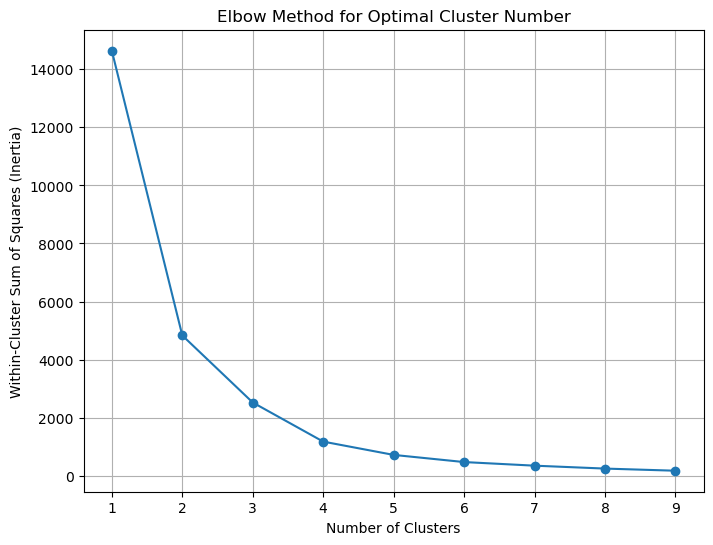

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


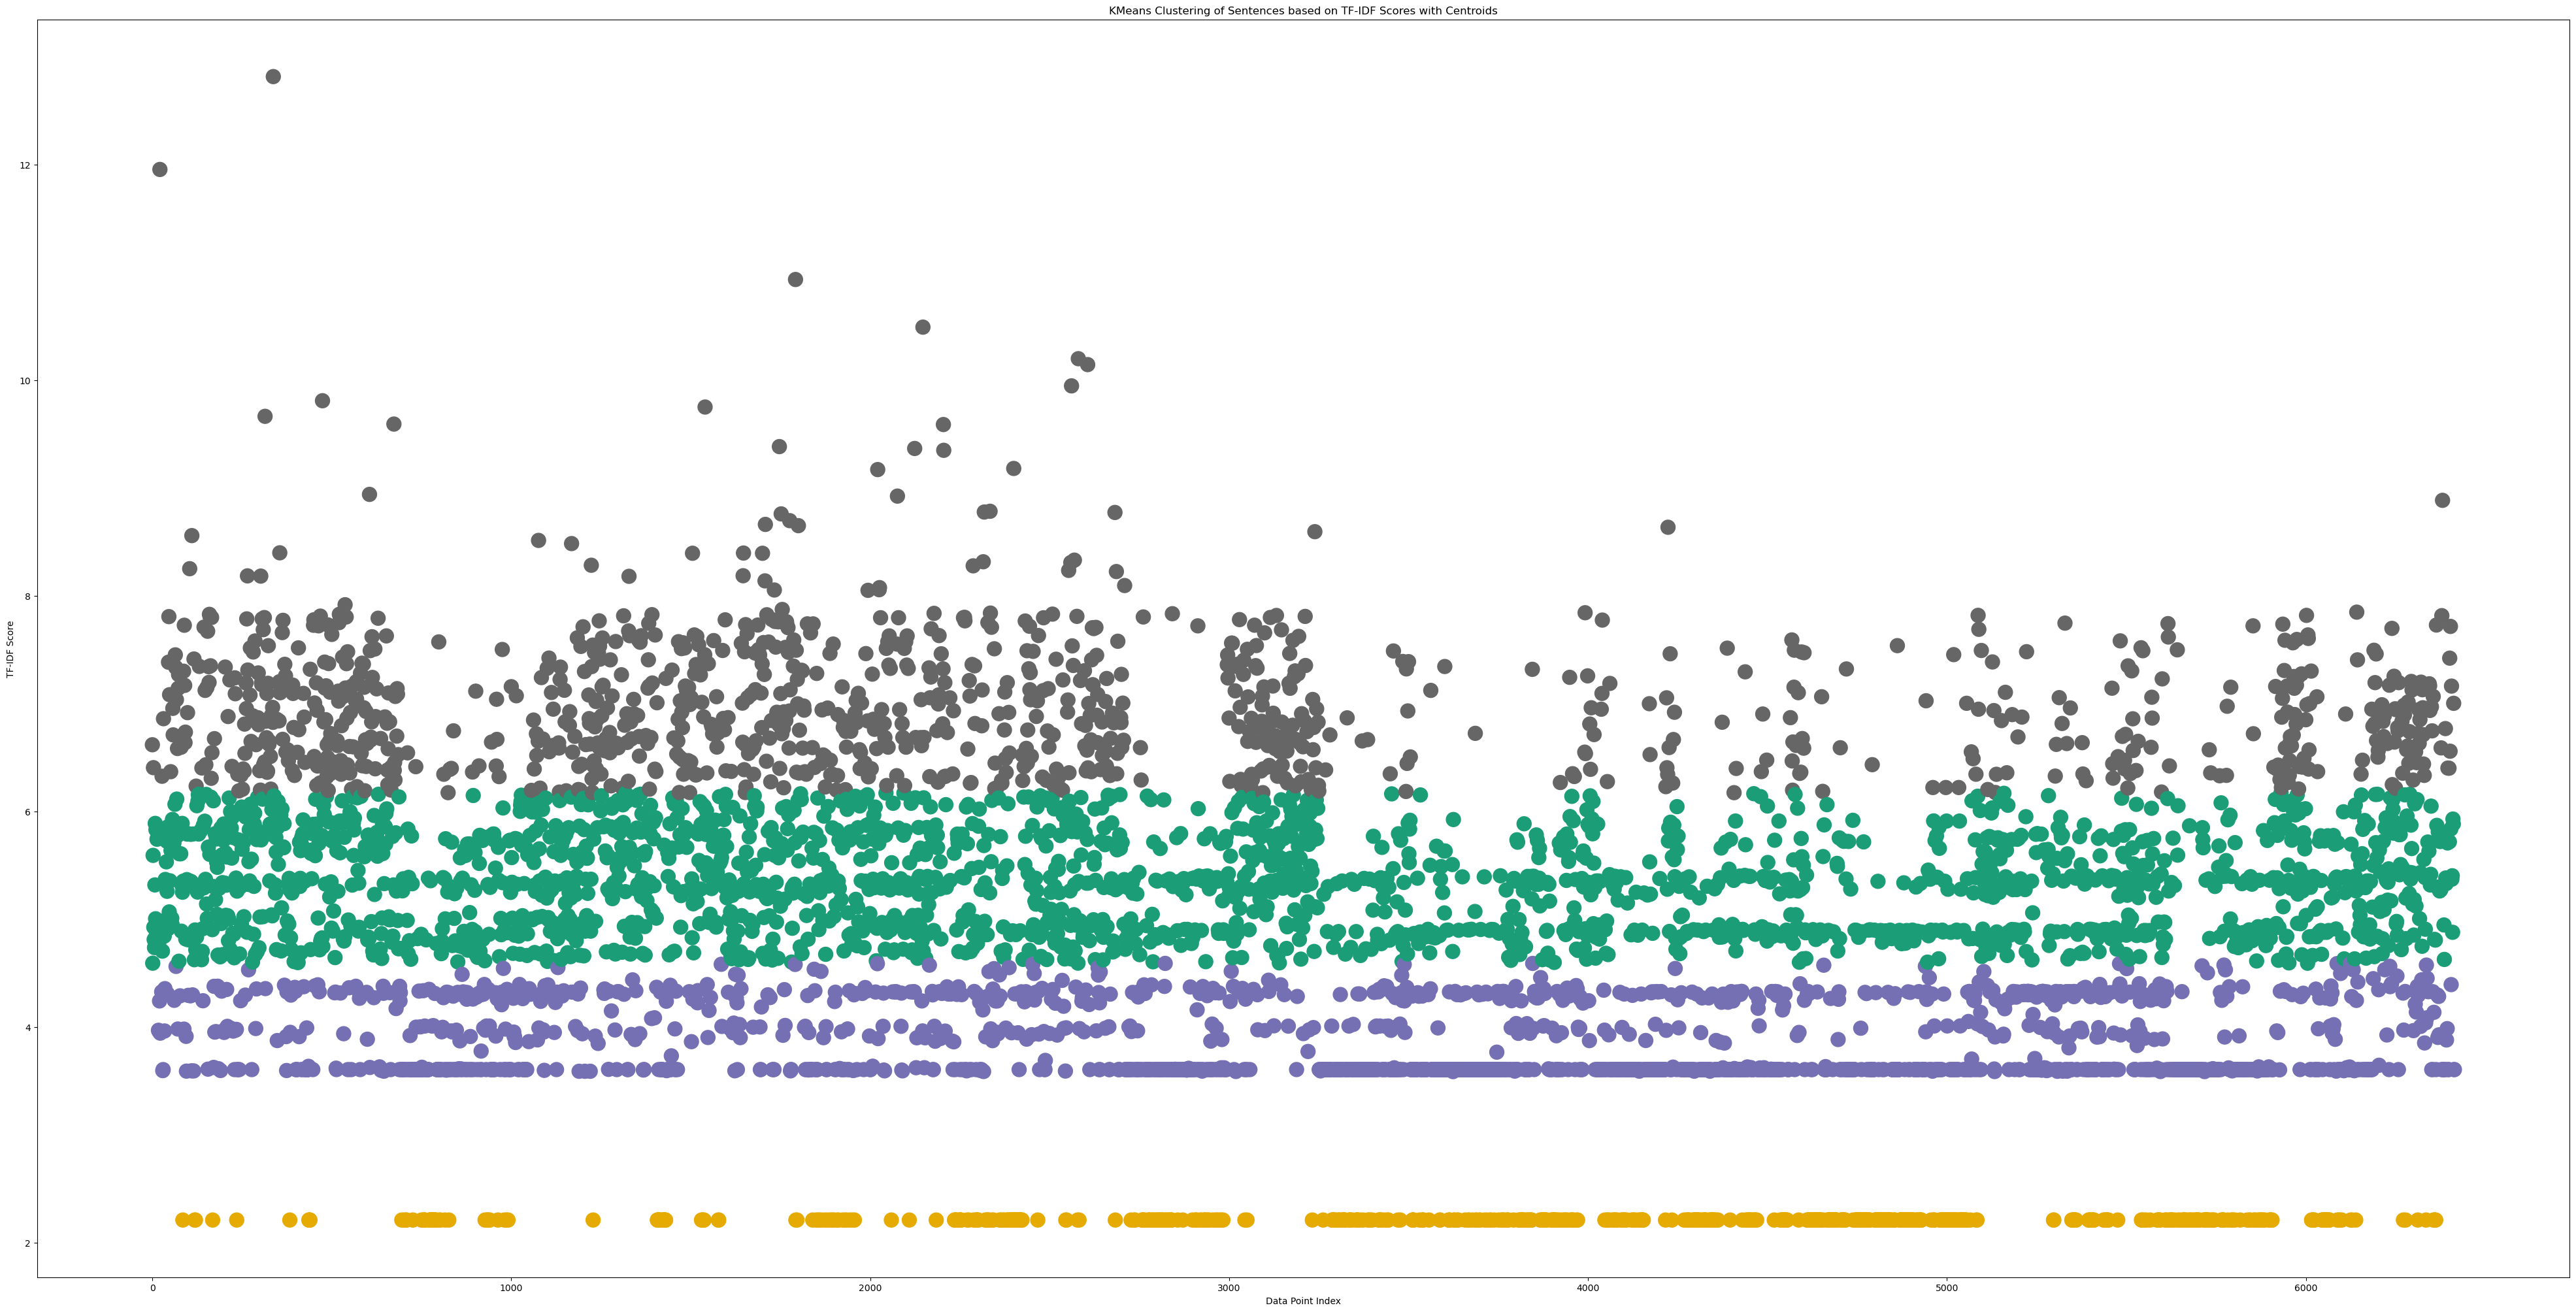

[3 0 0 ... 3 1 1]


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def calculate_tfidf_scores(sentences):
    """
    Calculate TF-IDF scores for sentences using TfidfVectorizer.

    Parameters:
    - sentences (list of str): List of sentences.

    Returns:
    - list of tuples: List of tuples containing sentences and their corresponding TF-IDF scores.
    """
    # Create a TfidfVectorizer
    vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)

    # Transform the lemmatized sentences into a TF-IDF matrix
    X_tf_idf = vectorizer.fit_transform(sentences)

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    # Convert the TF-IDF matrix to a dense array
    dense_tfidf_matrix = X_tf_idf.todense()

    # Sum TF-IDF scores for each sentence
    sentence_tfidf_scores = np.sum(dense_tfidf_matrix, axis=1).tolist()

    # Unpack the inner lists to get individual scores
    sentence_tfidf_scores = [score[0] for score in sentence_tfidf_scores]

    # Pair each sentence with its TF-IDF score
    sentences_with_scores = list(zip(sentences, sentence_tfidf_scores))

    return sentences_with_scores


casey = calculate_tfidf_scores(lemmatized_sentences)

def print_tfidf_scores(sentences_with_scores):
    """
    Print sentences with their corresponding TF-IDF scores.

    Parameters:
    - sentences_with_scores (list of tuples): List of tuples containing sentences and their TF-IDF scores.

    Returns:
    - list of float: List of TF-IDF scores.
    """
    # Print sentences with their corresponding TF-IDF scores
    for sentence, score in sentences_with_scores:
        print(f"Score: {score:.4f}\nSentence: {sentence}\n")

    num_sentences = len(sentences_with_scores)
    print(f"Number of Sentences: {num_sentences}")

    # Return the TF-IDF scores if needed in the future
    return [score for _, score in sentences_with_scores]

c2 = print_tfidf_scores(casey)

median_val = np.median(c2)
print("Median Value:", median_val)

def calculate_average_tfidf_and_formula_results(tfidf_scores_only, median_val):
    """
    Calculate the average TF-IDF score and apply a formula to each score.

    Parameters:
    - tfidf_scores_only (list of float): List of TF-IDF scores.
    - median_val (float): Median value of TF-IDF scores.

    Returns:
    - list of float: List of updated TF-IDF scores.
    """
    formula_results = []

    # Calculate the given formula for each sentence
    for i in tfidf_scores_only:
        a = i + median_val
        b = i + 1
        c = i % median_val
        d = a / b
        e = d + c
        formula_results.append(e)

    return formula_results

cole = calculate_average_tfidf_and_formula_results(c2, median_val)
print("Cole:", cole)

def update_tfidf_scores_and_sentences(tfidf_scores_only, formula_results):
    """
    Update TF-IDF scores with formula results.

    Parameters:
    - tfidf_scores_only (list of float): List of TF-IDF scores.
    - formula_results (list of float): List of results from applying a formula to TF-IDF scores.

    Returns:
    - list of float: Updated TF-IDF scores.
    """
    if len(tfidf_scores_only) == len(formula_results):
        # Add corresponding values and update tfidf_scores_only
        tfidf_scores_only = [tfidf + formula for tfidf, formula in zip(tfidf_scores_only, formula_results)]

    return tfidf_scores_only

jerry = update_tfidf_scores_and_sentences(c2, cole)
print("Jerry:", jerry)

def get_sentences_with_updated_scores(sentences, scores):
    """
    Pair sentences with their updated TF-IDF scores.

    Parameters:
    - sentences (list of str): List of sentences.
    - scores (list of float): List of TF-IDF scores.

    Returns:
    - list of tuples: List of tuples containing sentences and their updated TF-IDF scores.
    """
    result = []
    for sentence, score in zip(sentences, scores):
        result.append((f"Sentence: {sentence}", f"Score: {str(score)}"))
    return result

# Assuming x1 contains tokenized sentences and jerry contains corresponding scores
stored_data = get_sentences_with_updated_scores(lemmatized_sentences, jerry)
print(stored_data)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

def plot_elbow_curve(tfidf_scores_array, cluster_range):
    """
    Plot the elbow curve to determine the optimal number of clusters for KMeans clustering.

    Parameters:
    - tfidf_scores_array (numpy.ndarray): Numpy array containing TF-IDF scores.
    - cluster_range (range): Range of potential cluster numbers.

    Returns:
    - None
    """
    # Initialize an empty list to store the inertia values (within-cluster sum of squares)
    inertia_values = []

    # Perform KMeans clustering for different cluster numbers and store the inertia values
    for num_clusters in cluster_range:
        kmeans = KMeans(n_clusters=num_clusters, random_state=42)
        kmeans.fit(tfidf_scores_array)
        inertia_values.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(cluster_range, inertia_values, marker='o')
    plt.title('Elbow Method for Optimal Cluster Number')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.grid(True)
    plt.show()


tfidf_scores_array = np.array(jerry).reshape(-1, 1)
cluster_range = range(1, 10)

plot_elbow_curve(tfidf_scores_array, cluster_range)


def perform_kmeans(tfidf_scores_array, num_clusters=4):
    """
    Perform KMeans clustering on TF-IDF scores.

    Parameters:
    - tfidf_scores_array (numpy.ndarray): Numpy array containing TF-IDF scores.
    - num_clusters (int): Number of clusters.

    Returns:
    - numpy.ndarray: Array of cluster labels.
    """
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(tfidf_scores_array)
    labels = kmeans.labels_

    # Plot the data points with their assigned clusters
    plt.figure(figsize=(50, 25))
    plt.scatter(range(len(tfidf_scores_array)), tfidf_scores_array, c=labels, cmap='Dark2', marker='o', s=250)

    plt.title('KMeans Clustering of Sentences based on TF-IDF Scores with Centroids')
    plt.xlabel('Data Point Index')
    plt.ylabel('TF-IDF Score')
    plt.show()

    return labels

now_you_see_me = perform_kmeans(tfidf_scores_array)
print(now_you_see_me)


In [17]:
def get_top_sentences_from_clusters(sentences, labels, scores, median_val, num_sentences_per_cluster=25):
    """
    Get the top sentences from each cluster based on TF-IDF scores.

    Args:
    - sentences (list of str): List of lemmatized sentences.
    - labels (list of int): Cluster labels assigned to each sentence.
    - scores (list of float): List of TF-IDF scores for each sentence.
    - median_val (float): Median value of TF-IDF scores.
    - num_sentences_per_cluster (int, optional): Number of top sentences to select from each cluster (default is 25).

    Returns:
    - dict: A dictionary where each key represents a cluster ID, and the corresponding value is a list of top sentences from that cluster.

    """
    cluster_sentences = {}

    for cluster_id in range(max(labels) + 1):
        # Get indices of sentences in the current cluster
        cluster_indices = [i for i, label in enumerate(labels) if label == cluster_id]

        # Filter sentences with scores greater than the median_val
        filtered_indices = [i for i in cluster_indices if scores[i] > median_val]

        # Sort the filtered indices based on scores in descending order
        sorted_indices = sorted(filtered_indices, key=lambda i: scores[i], reverse=True)

        # Take the top num_sentences_per_cluster sentences
        selected_indices = sorted_indices[:num_sentences_per_cluster]

        # Store the selected sentences in a list
        selected_sentences = [sentences[i] for i in selected_indices]

        # Store the selected sentences in the dictionary
        cluster_sentences[cluster_id] = selected_sentences

    return cluster_sentences

# Assuming 'casey_results' is the lemmatized sentences and 'now_you_see_me' is the cluster labels
top_sentences_by_cluster = get_top_sentences_from_clusters(casey, now_you_see_me, jerry, median_val)

# Print the top sentences from each cluster without scores
for cluster_id, sentences in top_sentences_by_cluster.items():
    print(f"\nCluster {cluster_id} - Top {len(sentences)} Sentences:")
    for sentence in sentences:
        print(f"{sentence}\n")



Cluster 0 - Top 25 Sentences:
('significant accounting judgement estimate determining applying accounting policy judgement often required choice specific policy assumption accounting estimate followed could materially affect reported amount asset liability income expense later determined different choice appropriate .', 4.688751509782645)

('significant accounting judgement estimate determining applying accounting policy judgement often required choice specific policy assumption accounting estimate followed could materially affect reported amount asset liability income expense later determined different choice appropriate .', 4.688751509782645)

('posttax benefit vested psp award must applied acquisition share required level shareholding achieved .', 3.5561642341286963)

('posttax benefit vested psp award must applied acquisition share required level shareholding achieved .', 3.5561642341286963)

('approximately three month data collated date currently reviewed agree acceptable emissi

In [18]:
def combine_top_sentences(cluster_sentences):
    """
    Combine top sentences from all clusters into a single list.

    Args:
    - cluster_sentences (dict): A dictionary where each key represents a cluster ID, and the corresponding value is a list of top sentences from that cluster.

    Returns:
    - list: A list containing combined top sentences from all clusters.

    Example:
    all_top_sentences = combine_top_sentences(top_sentences_by_cluster)
    """
    combined_sentences = []

    for cluster_id, sentences in cluster_sentences.items():
        combined_sentences.extend(sentences)

    # Print the combined sentences inside the function
    print("\nCombined Top Sentences from All Clusters:")
    for sentence, score in combined_sentences:
        print(f"Score: {score:.4f}\nSentence: {sentence}\n")

    return combined_sentences

# Combine sentences from all clusters
all_top_sentences = combine_top_sentences(top_sentences_by_cluster)



Combined Top Sentences from All Clusters:
Score: 4.6888
Sentence: significant accounting judgement estimate determining applying accounting policy judgement often required choice specific policy assumption accounting estimate followed could materially affect reported amount asset liability income expense later determined different choice appropriate .

Score: 4.6888
Sentence: significant accounting judgement estimate determining applying accounting policy judgement often required choice specific policy assumption accounting estimate followed could materially affect reported amount asset liability income expense later determined different choice appropriate .

Score: 3.5562
Sentence: posttax benefit vested psp award must applied acquisition share required level shareholding achieved .

Score: 3.5562
Sentence: posttax benefit vested psp award must applied acquisition share required level shareholding achieved .

Score: 3.5556
Sentence: approximately three month data collated date curren

In [19]:
def combine_sentences_into_string(sentences):
    """
    Combine sentences into a single string.

    Args:
    - sentences (list): A list of tuples where each tuple contains a sentence and its corresponding score.

    Returns:
    - str: A single string containing all sentences concatenated together.
    """
    combined_string = ""

    for sentence, _ in sentences:
        combined_string += sentence + " "

    return combined_string.strip()

# Assuming all_top_sentences is a list of tuples
all_combined_string = combine_sentences_into_string(all_top_sentences)

# Print the combined string
print("\nCombined String from All Top Sentences:")
print(all_combined_string)



Combined String from All Top Sentences:
significant accounting judgement estimate determining applying accounting policy judgement often required choice specific policy assumption accounting estimate followed could materially affect reported amount asset liability income expense later determined different choice appropriate . significant accounting judgement estimate determining applying accounting policy judgement often required choice specific policy assumption accounting estimate followed could materially affect reported amount asset liability income expense later determined different choice appropriate . posttax benefit vested psp award must applied acquisition share required level shareholding achieved . posttax benefit vested psp award must applied acquisition share required level shareholding achieved . approximately three month data collated date currently reviewed agree acceptable emission conversion methodology . 02 10 year 39 99 86 weighted average remaining contractual lif

In [20]:
!mkdir "/home/student/Downloads/fns2020_dataset/gen_approach_1"
r'D:\Mtech NITK\Sem 2\Topic in NLP\fns2020_dataset\validation\validation\annual_reports'

The syntax of the command is incorrect.


In [21]:
gsPath = r'D:\Mtech NITK\Sem 2\Topic in NLP\fns2020_dataset\validation\validation\gold_summaries'
def loadFile(filepath):
    filename = os.path.basename(filepath)[:-4]
    
    fileCont = open(filepath,"r").read().strip()
    
    summFile = filename+"_1.txt"
    
    gs = open(os.path.join(gsPath,summFile),"r").read().strip()
    
    return fileCont,gs

In [23]:


# # Create a new variable for storing only the TF-IDF scores
# tfidf_scores_only = [score for _, score in sentences_with_scores]

# # Print only the TF-IDF scores
# print("TF-IDF Scores of Sentences:")
# for score in tfidf_scores_only:
#     print(f"{score:.4f}")

# # Print the total number of sentences
# num_sentences = len(sentences_with_scores)
# print(f"\nNumber of Sentences: {num_sentences}")


# print(type(tfidf_scores_only))

In [24]:
# # Calculate the average of all TF-IDF scores
# average_tfidf_score = np.mean(tfidf_scores_only)

# print(average_tfidf_score)

# # Create a list to store results of the given formula
# formula_results = []

# # Calculate the given formula for each sentence
# for i in range(len(sentences_with_scores)):
#     formula_result = ((i + average_tfidf_score) / (i + 1)) + (i % average_tfidf_score)
#     formula_results.append(formula_result)

# # Print only the formula results
# for result in formula_results:
#     print(f"Result: {result:.4f}")

# # Print the total number of sentences
# num_sentences = len(sentences_with_scores)
# print(f"Number of Sentences: {num_sentences}")



In [25]:

# sentences_with_formula_results = list(zip(sentences, formula_results))

# # Print sentences with their corresponding formula results
# for sentence, result in sentences_with_formula_results:
#     print(f"Result: {result:.4f}\nSentence: {sentence}\n")

# num_sentences = len(sentences_with_formula_results)
# print(f"Number of Sentences: {num_sentences}")

In [26]:
# # Pair each sentence with its formula result
# sentences_with_formula_results = list(zip(sentences, formula_results))

# # Sort the sentences based on their formula results
# sorted_sentences_with_formula_results = sorted(sentences_with_formula_results, key=lambda x: x[1],reverse = True)

# # Print sentences with their corresponding sorted formula results
# for sentence, result in sorted_sentences_with_formula_results:
#     print(f"Result: {result:.4f}\nSentence: {sentence}\n")

# # Print the total number of sentences
# num_sentences = len(sorted_sentences_with_formula_results)
# print(f"Number of Sentences: {num_sentences}")


In [27]:
# if len(tfidf_scores_only) == len(formula_results):
#     # Add corresponding values and update tfidf_scores_only
#     tfidf_scores_only = [tfidf + formula for tfidf, formula in zip(tfidf_scores_only, formula_results)]
#     print("Updated tfidf_scores_only:", tfidf_scores_only)
# else:
#     print("Error: The lengths of tfidf_scores_only and formula_results should be the same.")


In [28]:
# updated_sentences_with_scores = list(zip(sentences, tfidf_scores_only))
# for sentence, score in updated_sentences_with_scores:
#     print(f"Score: {score:.4f}\nSentence: {sentence}\n")


In [29]:
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# import numpy as np

# # Convert the TF-IDF scores to a numpy array
# tfidf_scores_array = np.array(tfidf_scores_only).reshape(-1, 1)
# #tfidf_scores_array = np.array(formula_results).reshape(-1, 1)

# # Create a range of potential cluster numbers
# cluster_range = range(1, 10)

# # Initialize an empty list to store the inertia values (within-cluster sum of squares)
# inertia_values = []

# # Perform KMeans clustering for different cluster numbers and store the inertia values
# for num_clusters in cluster_range:
#     kmeans = KMeans(n_clusters=num_clusters, random_state=42)
#     kmeans.fit(tfidf_scores_array)
#     inertia_values.append(kmeans.inertia_)

# # Plot the elbow curve
# plt.figure(figsize=(8, 6))
# plt.plot(cluster_range, inertia_values, marker='o')
# plt.title('Elbow Method for Optimal Cluster Number')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
# plt.grid(True)
# plt.show()


In [30]:
# # Optimal number of clusters obtained from the elbow method
# k_optimal = 25
# # Insert the optimal number of clusters here

# # Initialize KMeans with the optimal number of clusters
# kmeans_optimal = KMeans(n_clusters=k_optimal, random_state=42)

# # Fit KMeans to the TF-IDF scores
# kmeans_optimal.fit(tfidf_scores_array)

# # Get cluster assignments and centroids
# cluster_assignments = kmeans_optimal.labels_
# centroids = kmeans_optimal.cluster_centers_


# # Add cluster assignments and centroids to the original data
# for i, (sentence, score) in enumerate(updated_sentences_with_scores):
#     sentences_with_scores[i] = (sentence, score, cluster_assignments[i])

# clustered_sentences = [[] for _ in range(k_optimal)]
# for i, (sentence, score) in enumerate(updated_sentences_with_scores):
#     cluster = cluster_assignments[i]
#     clustered_sentences[cluster].append((sentence, score))

# # Plot the clusters and centroids
# plt.figure(figsize=(10, 8))
# colors = plt.cm.nipy_spectral(np.linspace(0, 1, k_optimal))

# for cluster, sentences_in_cluster in enumerate(clustered_sentences):
#     x_values = [score for _, score in sentences_in_cluster]
#     y_values = [cluster] * len(sentences_in_cluster)
#     plt.scatter(x_values, y_values, color=colors[cluster], label=f'Cluster {cluster}')

# # Plot centroids
# for cluster, centroid in enumerate(centroids):
#     plt.scatter(centroid, cluster, marker='x', color='red', s=200, linewidths=3, label=f'Centroid {cluster}')

# plt.title('KMeans Clustering of Sentences based on TF-IDF Scores with Centroids')
# plt.xlabel('TF-IDF Scores')
# plt.ylabel('Cluster')
# plt.legend()
# plt.show()

In [31]:
# import heapq

# # Dictionary to store unique top 4 sentences for each cluster
# top_sentences_per_cluster = {cluster: set() for cluster in range(k_optimal)}

# # Populate the dictionary with unique top 4 sentences for each cluster
# for cluster, sentences_in_cluster in enumerate(clustered_sentences):
#     unique_top_sentences = set()
#     for sentence, score in heapq.nlargest(25, sentences_in_cluster, key=lambda x: x[1]):
#         if sentence not in unique_top_sentences:
#             unique_top_sentences.add(sentence)
#     top_sentences_per_cluster[cluster] = unique_top_sentences

# # Print the clusters and sentences with scores greater than or equal to mean_tfidf_score
# print("\nClusters and Sentences with Scores Greater than or Equal to Mean TF-IDF Score:")
# for cluster, sentences_in_cluster in enumerate(clustered_sentences):
#     for sentence, score in sentences_in_cluster:
#         if score >= average_tfidf_score:
#             print(f"Cluster {cluster}, Score: {score:.4f} - {sentence}")


In [32]:


# # Dictionary to store unique top 4 sentences for each cluster
# top_sentences_per_cluster = {cluster: set() for cluster in range(k_optimal)}

# # Populate the dictionary with unique top 4 sentences for each cluster
# for cluster, sentences_in_cluster in enumerate(clustered_sentences):
#     unique_top_sentences = set()
#     for sentence, score in heapq.nlargest(25, sentences_in_cluster, key=lambda x: x[1]):
#         if sentence not in unique_top_sentences:
#             unique_top_sentences.add(sentence)
#     top_sentences_per_cluster[cluster] = unique_top_sentences

# # Print the clusters and sentences with scores greater than or equal to mean_tfidf_score
# print("\nClusters and Sentences with Scores Greater than or Equal to Mean TF-IDF Score:")
# for cluster, sentences_in_cluster in enumerate(clustered_sentences):
#     for sentence, score in sentences_in_cluster:
#         if score >= average_tfidf_score:
#             print(f"Cluster {cluster}, Score: {score:.4f} - {sentence}")

# import heapq
# combined_sentences_per_cluster = {cluster: [] for cluster in range(k_optimal)}


# for cluster, sentences_in_cluster in enumerate(clustered_sentences):
#     top_sentences = heapq.nlargest(25, sentences_in_cluster, key=lambda x: x[1])
#     combined_sentences = [sentence for sentence, _ in top_sentences]
#     combined_sentences_per_cluster[cluster] = combined_sentences

# # Print the combined sentences for each cluster
# for cluster, combined_sentences in top_sentences_per_cluster.items():
#     combined_text = ' '.join(combined_sentences)
#     print(f"\nCombined Sentences in Cluster {cluster}:")
#     print(combined_text)

# # Create a new variable with all combined sentences
# all_combined_sentences = [sentence for sentences in combined_sentences_per_cluster.values() for sentence in sentences]
# all_combined_text = ' '.join(all_combined_sentences)


# # Create a new variable with all combined sentences
# all_combined_sentences = [sentence for sentences in top_sentences_per_cluster.values() for sentence in sentences]
# all_combined_text = ' '.join(all_combined_sentences)

# # Create a new variable 'captcha' with all combined sentences from all clusters
# captcha = ' '.join(all_combined_sentences)
# #captcha = captcha[:10000]
# print(len(captcha))
# print(captcha)

In [33]:
# # Create a new variable with all combined sentences
# all_combined_sentences = [sentence for sentences in top_sentences_per_cluster.values() for sentence in sentences]
# all_combined_text = ' '.join(all_combined_sentences)

# # Create a new variable 'captcha' with all combined sentences from all clusters
# captcha = ' '.join(all_combined_sentences)
# #captcha = captcha[:10000]
# print(len(captcha))
# print(captcha)

In [22]:
from nltk.tokenize import word_tokenize

def find_matched_tokens(original_text, preprocessed_text):
    """
    Find tokens in the preprocessed text that are present in the original text.

    Args:
    - original_text (str): The original text.
    - preprocessed_text (str): The preprocessed text.

    Returns:
    - list: A list of tokens from the preprocessed text that are present in the original text.

    Example:
    matched_tokens = find_matched_tokens(original_text, preprocessed_text)
    """
    # Tokenize the preprocessed text
    preprocessed_tokens = word_tokenize(preprocessed_text)

    # Tokenize the original text
    original_tokens = word_tokenize(original_text)

    # Find tokens from the preprocessed text present in the original text
    matched_tokens = [token for token in preprocessed_tokens if token in original_tokens]

    return matched_tokens

def find_matched_tokens_as_sentences(original_text, preprocessed_text):
    """
    Find tokens in the preprocessed text that are present in the original text and concatenate them into sentences.

    Args:
    - original_text (str): The original text.
    - preprocessed_text (str): The preprocessed text.

    Returns:
    - str: Concatenated sentences formed from the matched tokens.

    Example:
    matched_sentences = find_matched_tokens_as_sentences(original_text, preprocessed_text)
    """
    matched_tokens = find_matched_tokens(original_text, preprocessed_text)
    matched_sentences = []
    current_sentence = []

    for word in word_tokenize(original_text):
        if word in matched_tokens:
            current_sentence.append(word)
        if word in [".", "?", "!"]: 
            matched_sentences.append(" ".join(current_sentence))
            current_sentence = []

    matched_tokened_sentences = ' '.join(matched_sentences)
    matched_tokened_sentences = matched_tokened_sentences[:10000]  
    return matched_tokened_sentences



matched_sentences = find_matched_tokens_as_sentences(map_to_data, all_combined_string)

print("Matched Sentences:", matched_sentences)


Matched Sentences: 2017 plc 2017 . . provide hardware software related industrial . designed productivity clear work . 100 100 per share 2016 2017 1 . adjusted performance represent excluding certain . constant exchange include basis . performance . see 2 page . 2016 operating profit 1 2016 operating profit 2016 earnings per share 1 2016 earnings per share 2016 operating cash conversion 1 75 2016 113 2 s 4 6 8 10 s 14 16 18 20 28 33 34 39 40 46 48 s 50 52 53 56 58 62 64 79 84 s plc 92 93 94 95 96 97 142 plc 143 plc 156 1 plc business overview first year pleasing see deliver 6 increase constant currency organic 1 driving 8 increase adjusted operating profit . increased 13 2017 million reported operating profit increased million operating reported basis adjusted basis . conversion 2 75 adjusted operating profit following material growth capex . earnings per share increased 14 reported basic . continues make good strategy year made number including . s financial position robust net millio

# Performance Metrics

In [4]:
import pandas as pd

def calculate_average(csvpath):
    # Read the csv file into a dataframe
    df = pd.read_csv(csvpath)
    df = df.dropna(how='all')
    selected_columns = df[["ROUGE-Type", "Avg_Recall", "Avg_Precision", "Avg_F-Score"]]
    grouped = selected_columns.groupby("ROUGE-Type")[["Avg_Recall", "Avg_Precision", "Avg_F-Score"]].mean()
    return grouped

x = calculate_average("/home/student/Downloads/Approach1.csv")
print(x)

            Avg_Recall  Avg_Precision  Avg_F-Score
ROUGE-Type                                        
ROUGE-1       0.354958       0.272941     0.298616
ROUGE-2       0.121552       0.070951     0.086535
ROUGE-L       0.336809       0.370367     0.346474
ROUGE-SU4     0.192062       0.099186     0.126440


In [35]:
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import string

# def reverse_preprocessing_for_matching(lemmatized_sentence, original_sentence, max_words=1500):
#   # Tokenize lemmatized sentence
#     lemmatized_tokens = lemmatized_sentence.split()

#   # Remove stop words, URLs, and punctuation
#     stop_words = set(stopwords.words('english'))
#     lemmatized_tokens = [token for token in lemmatized_tokens if token.lower() not in stop_words and token not in string.punctuation]

#   # Filter original sentence words based on presence in lemmatized tokens
#     original_tokens = [token for token in word_tokenize(original_sentence) if token.lower() in lemmatized_tokens]

#   # Limit the filtered sentence to max_words
#     original_tokens = original_tokens[:min(len(original_tokens), max_words)]

#   # Reconstruct and return the matched sentence
#     return ' '.join(original_tokens)


# reconstructed_text = reverse_preprocessing_for_matching(captcha, map_to_data)

# print("Matched Sentence:", reconstructed_text)
# num_words_in_reconstructed = len(reconstructed_text.split())
# print(f"Number of Words in Matched Sentence: {num_words_in_reconstructed}\n")


In [23]:
# def summarize():
#     data_dir = "./fns2020_dataset/validation/annual_reports/"
#     gsPath = "./fns2020_dataset/validation/gold_summaries"
#     for file in os.listdir(data_dir):
#         print(file)
#         fileCon,summ = loadFile(os.path.join(data_dir,file))
        
        
#         data = remove_url(fileCon)
#         map_to_data = data
#         data = remove_punc(data)
#         data = remove_stopwords(data)
        
#         data = remove_phone_numbers(data)
#         data = remove_ellipsis(data)
#         data = remove_em_dashes(data)
#         data = remove_pattern(data)
#         data = remove_multiple_pound_symbols(data)
        
#         data = clean_the_text(data)
#         formatted_data = format_pound_values(data)


#         sentences = sent_tokenize(formatted_data)
#         sammy = sentences

#         lemmatized_sentences = [lemmatize_sentence(sentence) for sentence in sentences]
#         casey = calculate_tfidf_scores(lemmatized_sentences)
#         c2 = print_tfidf_scores(casey)

#         median_val = np.median(c2)
#         cole = calculate_average_tfidf_and_formula_results(c2,median_val)
#         jerry = update_tfidf_scores_and_sentences(c2, cole)
#         stored_data = get_sentences_with_updated_scores(casey, jerry)
#         tfidf_scores_array = np.array(jerry).reshape(-1, 1)
#         cluster_range = range(1, 10)
#         plot_elbow_curve(tfidf_scores_array, cluster_range)
#         optimal_num_clusters = 4  
#         now_you_see_me =perform_kmeans(tfidf_scores_array, optimal_num_clusters)
#         top_sentences_by_cluster = get_top_sentences_from_clusters(casey, now_you_see_me, jerry, median_val)
#         all_top_sentences = combine_top_sentences(top_sentences_by_cluster)
#         all_combined_string = combine_sentences_into_string(all_top_sentences)
#         matched_sentences = find_matched_tokens_as_sentences(map_to_data, all_combined_string)
        
        
        
        
#         filename = file[:-4]
        
#         with open(f"./fns2020_dataset/gen_approach_1/{filename}_sysSumm.txt","w+") as f:
#             f.write(matched_sentences)
#         break
        


# summarize()

FileNotFoundError: [WinError 3] The system cannot find the path specified: './fns2020_dataset/validation/annual_reports/'